In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = r"C:\\Users\\pc\\OneDrive\\Desktop\\Dataset\\Train\\"
valid_path = r"C:\\Users\\pc\\OneDrive\\Desktop\\Dataset\\Test\\"

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [3]:
folders = glob(r'C:\\Users\\pc\\OneDrive\\Desktop\\Dataset\\Train\\*')
print(len(folders))

10


In [4]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [5]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [7]:
training_set = train_datagen.flow_from_directory(r"C:\\Users\\pc\\OneDrive\\Desktop\\Dataset\\Train\\",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6611 images belonging to 10 classes.


In [8]:
test_set = test_datagen.flow_from_directory(r"C:\\Users\\pc\\OneDrive\\Desktop\\Dataset\\Test\\",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1656 images belonging to 10 classes.


In [9]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
207/207 [==============================] - 2227s 11s/step - loss: 1.6780 - accuracy: 0.6867 - val_loss: 0.4550 - val_accuracy: 0.8406
Epoch 2/15
207/207 [==============================] - 2157s 10s/step - loss: 0.3707 - accuracy: 0.8810 - val_loss: 0.1918 - val_accuracy: 0.9384
Epoch 3/15
207/207 [==============================] - 2150s 10s/step - loss: 0.1800 - accuracy: 0.9431 - val_loss: 0.1687 - val_accuracy: 0.9481
Epoch 4/15
207/207 [==============================] - 2143s 10s/step - loss: 0.1912 - accuracy: 0.9354 - val_loss: 0.1386 - val_accuracy: 0.9505
Epoch 5/15
207/207 [==============================] - 2128s 10s/step - loss: 0.1022 - accuracy: 0.9690 - val_loss: 0.1172 - val_accuracy: 0.9601
Epoch 6/15
207/207 [==============================] - 2124s 10s/step - loss: 0.1024 - accuracy: 0.9663 - val_loss: 0.1228 - val_accuracy: 0.9614
Epoch 7/15
207/207 [==============================] - 2108s 10s/step - loss: 0.0951 - accuracy: 0.9691 - val_loss: 0.0666 - val_ac

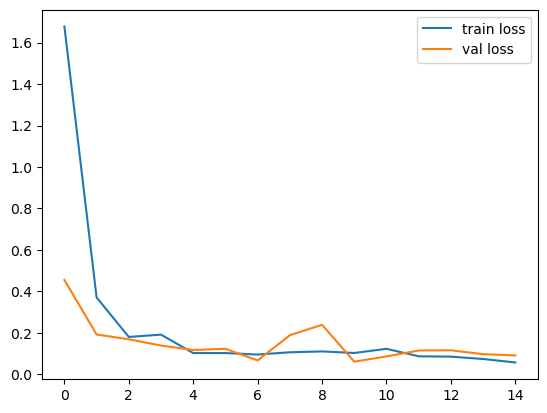

<Figure size 640x480 with 0 Axes>

In [10]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_Vgg')

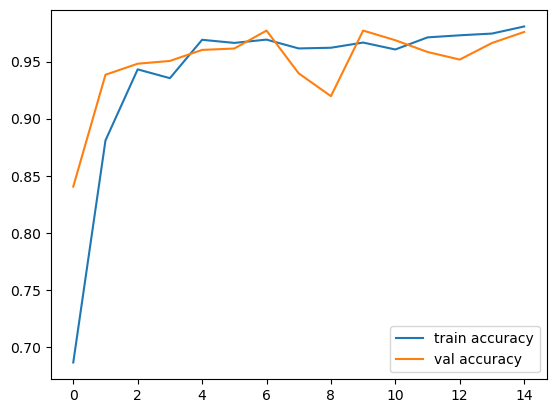

<Figure size 640x480 with 0 Axes>

In [12]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc+_Vgg')

In [13]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_VGG19_model.h5')